# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Técnicas de resampleo: Obtener un sample desde otro.

# Bootstrap

Se basa en crear el nuevo sample en base a elegir *con reemplazo* cada nuevo dato con probabilidad uniforme desde el sample original. Calculando asi el estimador deseado de cada sample creado (Bootstrap sample).



Sea $x = (x_1, x_2, \dotsc , x_n )$ un sample aleatorio desde una distribución desconocida $F$. <br>


$F \stackrel{\mathrm{iid}}{\longrightarrow} \boldsymbol{x} \stackrel{s}{\longrightarrow} \hat{\theta}$

> Objetivo: Deseamos conocer el error estándar de un estimador $\hat{\theta}$ calculado según $s(x)$. Esto es $\hat{\theta} = s(x)$.

Para lograr el objetivo, nos gustaría tener nuevas observaciones de $F$, pero $F$ es una distribución **desconocida**. Para esto usamos Bootstrap.

> Bootstrap: Generar nuevos *samples* $x^* = (x_1^*, x_2^*, \dotsc, x_n^*)$ desde el *sample original* $x$. Eligiendo $n$ observaciones nuevas $x_i^*$ uniformemente *con reemplazo* desde  el sample original $x$.








## Algoritmo Bootstrap

REPETIR $B$ Veces {

1. Obtener $x^* = (x_1^*, x_2^*, \dotsc, x_n^*)$ llamado *Bootstrap sample*, donde cada $x_i^*$ es escogido uniformemente con reemplazo desde $x$. 

$\hat{F} \stackrel{\mathrm{iid}}{\longrightarrow} \boldsymbol{x^*} \stackrel{s}{\longrightarrow} \hat{\theta^*}$

2. Calcular estimador de interés para ese bootstrap sample $\hat{\theta^*} = s(x^*)$ 

} END

3.  $\widehat{\mathrm{se}}_{\mathrm{boot}}=\left[\sum_{b=1}^{B}\left(\hat{\theta}^{* b}-\hat{\theta}^{*}\right)^{2} /(B-1)\right]^{1 / 2}, \quad$ $\hat{\theta}^{*}=\sum_{b=1}^{B} \hat{\theta}^{* b} / B$

En donde $\widehat{\mathrm{se}}_{\mathrm{boot}}$ es el error estándar obtenido según Bootstrap.


In [ ]:
def bootstrap_mean(data, iter = 200):
  means, B = [], iter

  for i in range(B):
    # Paso 1. 
    sample = np.random.choice(data, 
                              replace=True, 
                              size=len(data))
    # Paso 2.
    sample_mean = sample.mean() #s(sample)
    means.append(sample_mean)

  # Paso 3.
  boot_mean = np.mean(means)
  se_boot = np.std(means, ddof = 1)
  boot_ci = np.percentile(means, [2.5, 97.5])

  return means, boot_mean, se_boot, boot_ci
  
    



## Aplicaciones



### Fish Dataset
En este ejemplo trabajaremos con [Fish Dataset](https://www.kaggle.com/aungpyaeap/fish-market). En donde usaremos la variable 'Lenght1' de una de las especies de pescado 'Roach'.

In [ ]:
fish_data = pd.read_csv('/content/Fish.csv')
fish_data = fish_data.loc[fish_data["Species"] == "Roach"]["Length1"]
pd.DataFrame({'values': fish_data.describe()}).reset_index()

,index,values
0,count,20.000000
1,mean,20.645000
2,std,3.459917
3,min,12.900000
4,25%,18.900000
5,50%,20.500000
6,75%,22.025000
7,max,29.500000


Podemos calcular la media y un Intervalo de confianza :


In [ ]:
fish_mean = fish_data.mean()
conf_i = np.percentile(fish_data, [2.5, 97.5])
print(f'La media estimada de este sample es : {fish_mean}')
print(f'Con un intervalo de confianza del 95% : {conf_i}')

La media estimada de este sample es : 20.645000000000003
Con un intervalo de confianza del 95% : [14.61   27.3625]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


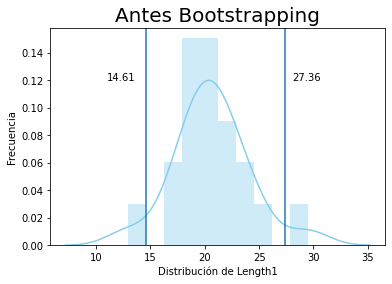

In [ ]:
ax = sns.distplot(fish_data,bins=10,kde=True,color='skyblue')
ax.axvline(conf_i[0])
ax.axvline(conf_i[1])
ax.text(11,0.12, conf_i[0])
ax.text(28,0.12, round(conf_i[1],2))
ax.set(xlabel='Distribución de Length1', ylabel='Frecuencia')
ax.set_title("Antes Bootstrapping", fontsize=20)
plt.show();

Aplicando Bootstrap

In [ ]:
means, boot_mean, se_boot, boot_ci = bootstrap_mean(fish_data, 1000)

In [ ]:
se_boot

0.7703382307563119

In [ ]:
print(f'La media estimada de este sample es : {boot_mean}')
print(f'Con un intervalo de confianza del 95% : {boot_ci}')

La media estimada de este sample es : 20.607215
Con un intervalo de confianza del 95% : [19.11475  22.165625]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


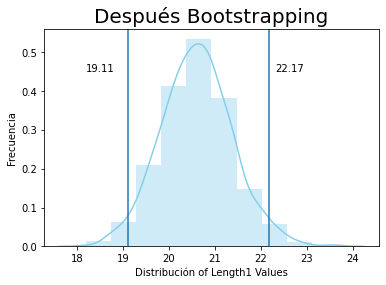

In [ ]:
ax = sns.distplot(means,bins=10,kde=True,color='skyblue')
ax.axvline(boot_ci[0])
ax.axvline(boot_ci[1])
ax.text(18.2,0.45, round(boot_ci[0], 2))
ax.text(22.3,0.45, round(boot_ci[1], 2))
ax.set_title("Después Bootstrapping", fontsize=20)
ax.set(xlabel='Distribución of Length1 Values', ylabel='Frecuencia')
plt.show();

### Largo de Llaves

In [ ]:
wrench_lengths = np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

In [ ]:
means, boot_mean, se_boot, boot_ci = bootstrap_mean(wrench_lengths, 1000)

In [ ]:
print(f'La media estimada de este sample es : {boot_mean}')
print(f'Con un intervalo de confianza del 95% : {boot_ci}')

La media estimada de este sample es : 10.0318849756104
Con un intervalo de confianza del 95% : [ 9.80798981 10.25961643]


In [ ]:
se_boot

0.11504953933184002

### Bootstrap Regression

Ahora veamos cómo funciona el bootstrapping con regresión. Bootstrapping ayuda a estimar la incertidumbre de los estimadores no estándar. Considere el estadístico $𝑅^2$ asociado con una regresión. Cuando ejecuta una regresión de mínimos cuadrados simple, obtiene un valor para $𝑅^2$. Pero veamos cómo podemos obtener un IC del 95% para $𝑅^2$.

In [ ]:
reg_data = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/regression_test.csv', index_col = 0)

In [ ]:
reg_data.head()

,y,Intercept,X1,X2
0,1.217851,1.0,0.696469,0.286139
1,1.555250,1.0,0.226851,0.551315
2,0.888520,1.0,0.719469,0.423106
3,1.736052,1.0,0.980764,0.684830
4,1.632073,1.0,0.480932,0.392118


In [ ]:
np.random.seed(123)
reg_fit = sm.OLS(reg_data['y'], reg_data.iloc[:, 1:]).fit()
reg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     278.9
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           6.33e-97
Time:                        22:18:22   Log-Likelihood:                -173.11
No. Observations:                1000   AIC:                             352.2
Df Residuals:                     997   BIC:                             366.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4802      0.024     61.379      0.000       1.433       1.528
X1            -0.5006      0.032    -15.818      0.000      -0.563      -0.438
X2             0.5251      0.031     17.097      0.000       0.465       0.585
==============================================================================
Omnibus:                      858.078   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.982
Skew:                          -0.025   Prob(JB):                     3.47e-14
Kurtosis:                       1.781   Cond. No.                         5.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg_fit.rsquared

0.3587547009414189

In [ ]:
rsquared_boot, sims = [], 1000

# Iteraciones
for i in range(sims):
    # Paso 1.
    bootstrap = reg_data.sample(n=reg_data.shape[0], replace=True)
    # Paso 2.
    rsquared_boot.append(sm.OLS(bootstrap['y'],bootstrap.iloc[:,1:]).fit().rsquared)

# Paso 3.
r_sq_95_ci = np.percentile(rsquared_boot, [2.5, 97.5])
print("R^2 95% CI = {}".format(r_sq_95_ci))
print('error estándar: {}'.format(np.std(rsquared_boot, ddof=1)))

R^2 95% CI = [0.31089312 0.40543591]
error estándar: 0.023399901251064472


## Bootstrap
- Es completamente automático: se puede escribir un único algoritmo maestro que introduce el conjunto de datos x la función $s(x)$, y se obtiene $\hat{se}_{boot}$

- Hemos descrito el bootstrap no paramétrico de una muestra. Existe también un boostrap paramétrico.

- Bootstrapping "sacude" los datos originales de forma más violenta que jackknife, produciendo desviaciones no locales $x^*$ desde $x$. El bootstrap es más confiable que jackknife para estadísticas imprecisas, ya que no dependen de derivados locales.

- $B = 200$ suele ser suficiente para evaluar $\hat{se}_{boot}$. Valores mayores, 1000 o 2000, será necesario para los intervalos de confianza de bootstrap.




# Jackknife

Siguiendo lo supuesto anteriormente. 

Sea $x = (x_1, x_2, \dotsc , x_n )$ un sample aleatorio desde una distribución desconocida $F$. 

Ahora se define el nuevo sample $x_{(i)} = (x_1, x_2, \dotsc, x_{i-1}, x_{i+1}, \dotsc, x_n )$. Notar que es el sample original $x$ pero sin considerar el elemento $i$.




## Algoritmo


REPETIR N Veces {
1. Obtener $x_{(i)}$ 
2. Calcular el estimador de interés para ese subsample $\hat{\theta_{i}} = s(x_{(i)})$


} END

3. Calcular *Estimador Jackknife del error estándar* $\widehat{\mathrm{se}}_{\mathrm{jack}}=\left[\frac{n-1}{n} \sum_{1}^{n}\left(\hat{\theta}_{(i)}-\hat{\theta}_{(\cdot)}\right)^{2}\right]^{1 / 2}, \quad$  $\hat{\theta}_{(\cdot)}=\sum_{1}^{n} \hat{\theta}_{(i)} / n$

In [ ]:
def jackknife_mean(data):
  means, n = [], len(data)
  index = np.arange(n)

  for i in range(n):
      # Paso 1.
      jk_sample = data[index != i]
      # Paso 2.
      means.append(jk_sample.mean()) #s(x)
  means_jk = np.mean(np.array(means))

  # Paso 3.
  jk_std = (n-1)**0.5*np.std(means)
  return means, means_jk, jk_std

## Aplicaciones

### Fish dataset

In [ ]:
means, means_jk, jk_std = jackknife_mean(fish_data)

In [ ]:
print(f'Media jackknife: {means_jk}')
print(f'error estándar: {jk_std}')

Media jackknife: 20.645
error estándar: 0.7736609824654956


### Largo de LLaves


In [ ]:
means, means_jk, jk_std = jackknife_mean(wrench_lengths)

In [ ]:
print(f'Media jackknife: {means_jk}')
print(f'error estándar: {jk_std}')

Media jackknife: 10.027109074099998
error estándar: 0.11339243375044471


Veamos como estimar un intervalo de confianza para la mediana

In [ ]:
np.random.seed(123)

median_lengths = []
n = len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    # Paso 1.
    jk_sample = wrench_lengths[index != i]
    # Paso 2.
    median_lengths.append(np.median(jk_sample)) #s(x)
median_lengths = np.array(median_lengths)


# Paso 3.
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Si asumimos normalidad podemos calcular los intervalos de confianza.
jk_lower_ci = jk_median_length - 1.96 * np.sqrt(jk_var)
jk_upper_ci = jk_median_length + 1.96 * np.sqrt(jk_var)
print('Jackknife median: {}'.format(jk_median_length))
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

Jackknife median: 9.946730270000003
Jackknife 95% CI lower = 9.138592415216381, upper = 10.754868124783625


## Jackknife

- No es paramétrico; ninguna forma especial de la distribución subyacente F
necesita ser asumido
- Es completamente automático: se puede escribir un único algoritmo maestro que introduce el conjunto de datos x la función $s(x)$, y se obtiene $\hat{se}_{jack}$
- El algoritmo funciona con conjuntos de datos de tamaño $n-1$, no $n$. Hay un escondido supuesto de un comportamiento uniforme en todos los tamaños de muestra. Esto puede ser preocupante para estadísticas como la mediana de la muestra que tienen una definición diferente para pares e impares
- El error estándar de jackknife está sesgado hacia arriba como una estimación de la verdadera error estándar


# Referencias
- https://web.stanford.edu/~hastie/CASI_files/PDF/casi.pdf
- https://github.com/Idilismiguzel/data_analysis
- https://towardsdatascience.com/resampling-methods-for-inference-analysis-e75fecfefcb2
- https://s3.amazonaws.com/assets.datacamp.com/production/course_6947/slides/chapter3.pdf
- https://si.biostat.washington.edu/sites/default/files/modules/2017_sisg_1_9_v3.pdf